In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from scripts.csv_continue_to_ds_discreet import csvContinue2DSDiscreet
from scripts.evaluate_model import evaluate_predictions


In [2]:
X, y = csvContinue2DSDiscreet()

In [3]:
(y[y==1]).count()

np.int64(342)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

dall'analisi del dataset emergono i seguenti parametri

| Parametro | F | T | Type
| :--- | :--- | :--- | :--- |
| age_is_null | 41% | 29% | boolean |
| IsAlone | 51% | 30% | boolean |
| IsSmallFamily | 29% | 58% | boolean |
| IsBigFamily | 40% | 16% | boolean |
| isChild | 37% | 58% | boolean |
| isTeen | 38% | 43% | boolean |
| isAdult | 38% | 38% | boolean |
| isSenior | 38% | 40% | boolean |
| isOld | 39% | 27% | boolean |
| FirstClass | 31% | 63% | boolean |
| SecondClass | 36% | 47% | boolean |
| ThirdClass | 56% | 24% | boolean |
| EmbarkedS | 50% | 34% | boolean |
| EmbarkedC | 34% | 55% | boolean |
| EmbarkedQ | 38% | 39% | boolean |
| Male | 74% | 19% | boolean |

che si possono dividere nelle seguenti fasce

| Parametro | classi 
| :--- | :--- | :--- | :--- |
| age | age_is_null, isChild, isTeen, isAdult, isSenior, isOld |
| family | IsAlone, IsSmallFamily, IsBigFamily |
| class | FirstClass, SecondClass, ThirdClass |
| embarked | EmbarkedS, EmbarkedC, EmbarkedQ
| Sex | Male |

il tutto mi porta a pensare che debba esserci un primo livello nascosto pari a 5 e un secondo pari a 2


In [5]:
pipe = Pipeline([
  ('under', RandomUnderSampler(random_state=0)),
  ('mlp', MLPClassifier(random_state=0))
])

In [ ]:
param_grid = {
  'mlp__alpha': [0.01],
  'mlp__solver': ['adam', 'sgd'],
  'mlp__activation': ['relu', 'tanh', 'logistic', 'identity'],
  'mlp__hidden_layer_sizes': [(9), (9,5), (9,5,3)], #  (9,5,3,2)
  'mlp__learning_rate': ['constant', 'adaptive'],
  'mlp__learning_rate_init': [0.01],
  'mlp__max_iter': [500, 1000], # , 2000
  'mlp__momentum': [0.9, 0.95, 0.99]
  }

In [7]:
gs = GridSearchCV(
  pipe,
  param_grid=param_grid,
  scoring="roc_auc",
  cv=StratifiedKFold(n_splits=2, shuffle=True, random_state=0),
  verbose=1,
  n_jobs=-1,
)

In [8]:
gs.fit(X_train, y_train)

Fitting 2 folds for each of 384 candidates, totalling 768 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('under',
                                        RandomUnderSampler(random_state=0)),
                                       ('mlp', MLPClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'mlp__activation': ['relu', 'tanh', 'logistic',
                                             'identity'],
                         'mlp__alpha': [0.01],
                         'mlp__hidden_layer_sizes': [9, (9, 5), (9, 5, 3),
                                                     (14, 12, 10, 8, 6, 4, 2)],
                         'mlp__learning_rate': ['constant', 'adaptive'],
                         'mlp__learning_rate_init': [0.01],
                         'mlp__max_iter': [500, 1000],
                         'mlp__momentum': [0.9, 0.95, 0.99],
                         'mlp__solver': ['adam', 'sgd']},
             scoring='roc_auc', verbose=1)

In [9]:
nn = gs.best_estimator_
nn.fit(X_train, y_train)

Pipeline(steps=[('under', RandomUnderSampler(random_state=0)),
                ('mlp',
                 MLPClassifier(alpha=0.01, hidden_layer_sizes=9,
                               learning_rate_init=0.01, max_iter=500,
                               random_state=0))])

In [12]:
gs.best_params_

{'mlp__activation': 'relu',
 'mlp__alpha': 0.01,
 'mlp__hidden_layer_sizes': 9,
 'mlp__learning_rate': 'constant',
 'mlp__learning_rate_init': 0.01,
 'mlp__max_iter': 500,
 'mlp__momentum': 0.9,
 'mlp__solver': 'adam'}

In [10]:
y_train_pred = nn.predict(X_train)
y_train_pred_proba = nn.predict_proba(X_train)
y_test_pred = nn.predict(X_test)
y_test_pred_proba = nn.predict_proba(X_test)


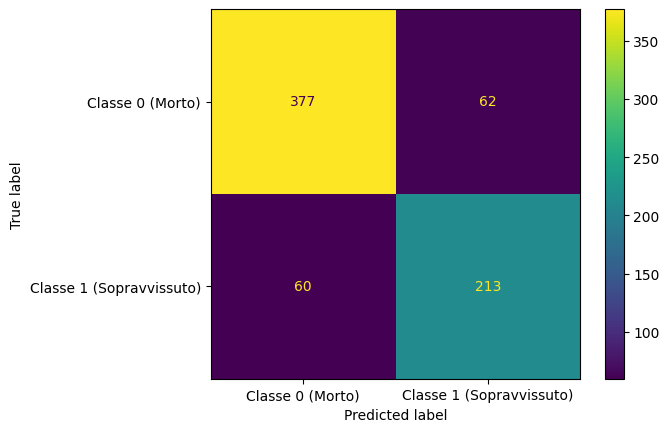

Percentuale di veri negativi: 85.88%
Percentuale di veri positivi: 78.02%
                          precision    recall  f1-score   support

        Classe 0 (Morto)       0.86      0.86      0.86       439
Classe 1 (Sopravvissuto)       0.77      0.78      0.78       273

                accuracy                           0.83       712
               macro avg       0.82      0.82      0.82       712
            weighted avg       0.83      0.83      0.83       712

[[377  62]
 [ 60 213]]


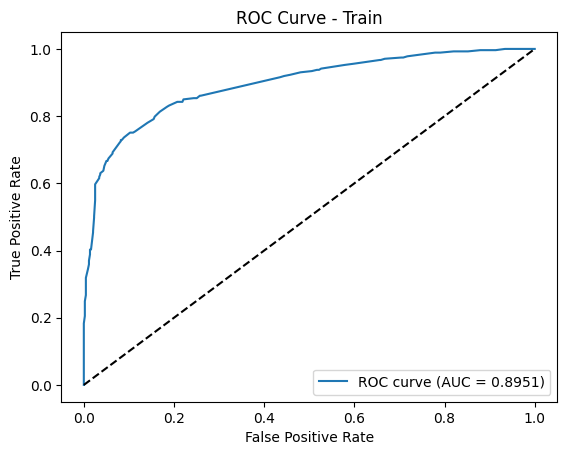

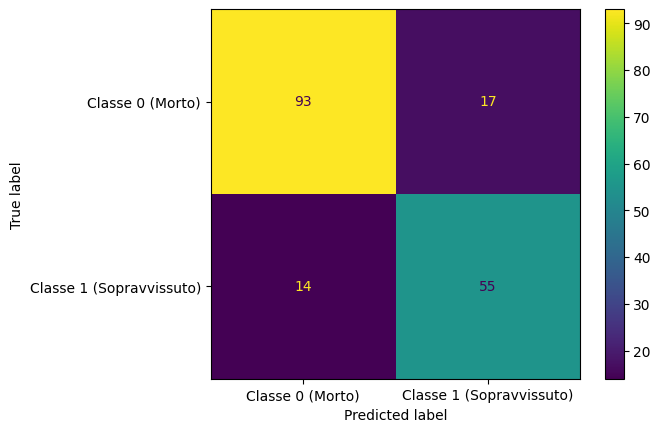

Percentuale di veri negativi: 84.55%
Percentuale di veri positivi: 79.71%
                          precision    recall  f1-score   support

        Classe 0 (Morto)       0.87      0.85      0.86       110
Classe 1 (Sopravvissuto)       0.76      0.80      0.78        69

                accuracy                           0.83       179
               macro avg       0.82      0.82      0.82       179
            weighted avg       0.83      0.83      0.83       179

[[93 17]
 [14 55]]


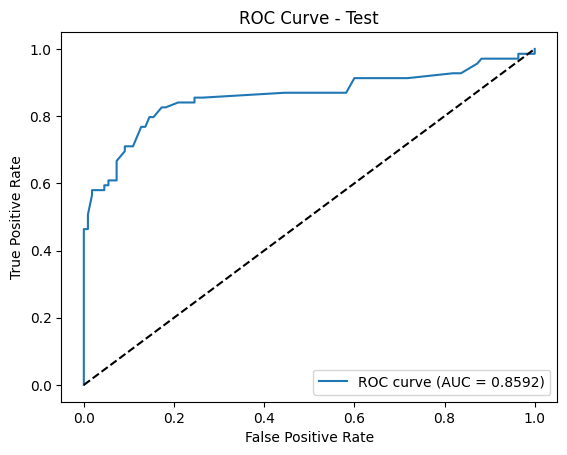

In [11]:
evaluate_predictions(y_train_pred, y_train, y_train_pred_proba[:,1], "Train")
evaluate_predictions(y_test_pred, y_test, y_test_pred_proba[:,1], "Test")